In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

فایل اکسل را در محیط کولب آپلود میکنیم

In [3]:
x=pd.read_csv('/content/Heart_Disease_Dataset.csv')#dataframe

# آ)

##اندازه دیتا

In [4]:
print(x.shape)

(1190, 12)


##بررسی اینکه دیتا در هر نمونه آیا ویژگی حذف شده دارد یا نه

In [5]:
# Check if each sample has missing data
missing_data = x.isnull().any().any()
if missing_data:
    print("Data has been deleted.")
else:
    print("No data has been deleted")

No data has been deleted


##بررسی بالانس بودن دو کلاس

In [6]:
x['target'].shape

(1190,)

In [7]:
counts=x['target'].value_counts()
print(counts)

1    629
0    561
Name: target, dtype: int64


پس می توان گفت نسبتا بالانس است

##رسم نمودار توزیع سن و توزیع جنسیت برای هر کلاس  (مجموعا چهار نمودار)
  

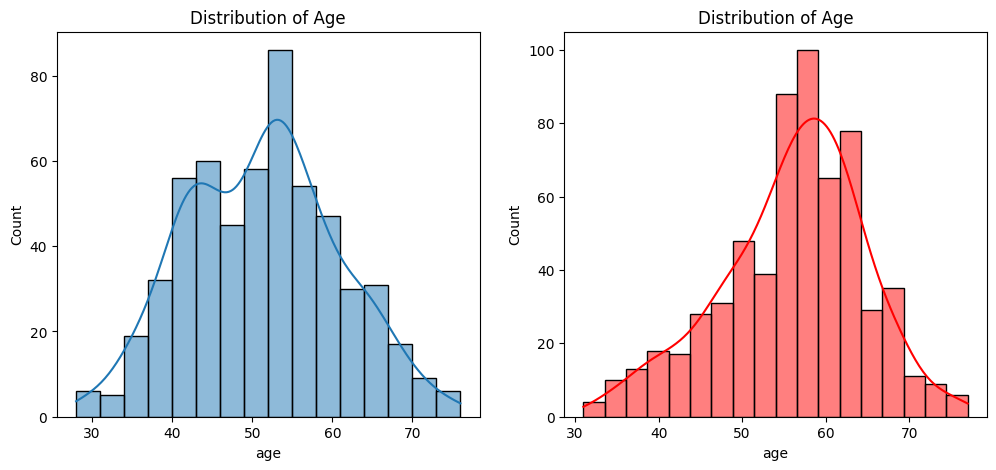

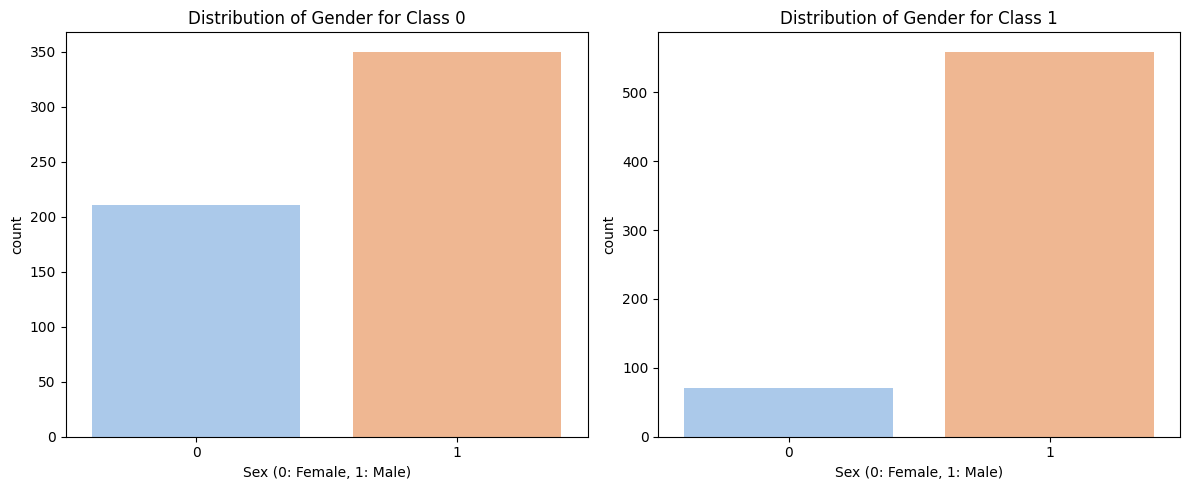

In [8]:
class0=x[x['target']==0]
class1=x[x['target']==1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(class0['age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(class1['age'], kde=True, color='red')
plt.title('Distribution of Age')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=class0, palette='pastel')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.title('Distribution of Gender for Class 0')

plt.subplot(1, 2, 2)
sns.countplot(x='sex', data=class1, palette='pastel')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.title('Distribution of Gender for Class 1')

plt.tight_layout()

#ب)

In [9]:
mean_class0 = class0.mean()
std_class0 = class0.std()

# Calculate the mean and standard deviation for each numerical feature in Class 1
mean_class1 = class1.mean()
std_class1 = class1.std()

# Calculate Z-Score for each sample for numerical features
z_scores_class0 = (class0 - mean_class0) / std_class0
z_scores_class1 = (class1 - mean_class1) / std_class1


# Set the threshold value to 3
threshold = 3

# Find outliers for each class for numerical features
outliers_class0 = np.where(np.abs(z_scores_class0) > threshold)[0]
outliers_class1 = np.where(np.abs(z_scores_class1) > threshold)[0]

# Remove outliers for numerical features
cleaned_class0 = class0.drop(class0.index[outliers_class0])
cleaned_class1 = class1.drop(class1.index[outliers_class1])

# Final sizes after removing outliers
final_size_class0 = len(cleaned_class0)
final_size_class1 = len(cleaned_class1)
print(f"Final size of Class 0 after removing outliers: {final_size_class0}")
print(f"Final size of Class 1 after removing outliers: {final_size_class1}")

Final size of Class 0 after removing outliers: 508
Final size of Class 1 after removing outliers: 590


In [10]:
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Calculate the mean and standard deviation for each numerical feature in the entire dataset
mean_dataset = x[numerical_features].mean()
std_dataset = x[numerical_features].std()

# Calculate Z-Score for each sample for numerical features
z_scores_dataset = (x[numerical_features] - mean_dataset) / std_dataset

# Set the threshold value to 3
threshold = 3

# Find outliers for the entire dataset for numerical features
outliers = np.where(np.abs(z_scores_dataset) > threshold)[0]

# Remove outliers from the entire dataset
cleaned_data = x.drop(x.index[outliers])

# Final size after removing outliers
final_size = len(cleaned_data)
print(f"Final size of the dataset after removing outliers: {final_size}")

Final size of the dataset after removing outliers: 1162


#ج)

In [11]:
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
# Find the maximum value for each feature in Class 0
max_values_class0 = cleaned_class0[numerical_features].max()

# Find the maximum value for each feature in Class 1
max_values_class1 = cleaned_class1[numerical_features].max()

max_values_total = pd.concat([max_values_class0, max_values_class1], axis=1).max(axis=1)

# Divide each data point by the maximum value to scale between 0 and 1 for Class 0
cleaned_class0[numerical_features] = cleaned_class0[numerical_features] / max_values_total

# Divide each data point by the maximum value to scale between 0 and 1 for Class 1
cleaned_class1[numerical_features] = cleaned_class1[numerical_features] / max_values_total

#د)

In [12]:
x_final = pd.concat([cleaned_class0, cleaned_class1])

# Select input features (X) and target variable (y)
X = x_final.drop(columns=['target'])  # Input features
y = x_final['target']  # Target variable

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear SVM model
svm_linear = SVC(kernel='linear')

# Train the model with the training data
svm_linear.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

print("Metrics for Linear Kernel:")
print(f"Accuracy: {accuracy_linear}")
print(f"Precision: {precision_linear}")
print(f"Recall: {recall_linear}")
print(f"F1 Score: {f1_linear}")

# Create an SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the model on the training data
svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the model on the testing data
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

print("\nMetrics for RBF Kernel:")
print(f"Accuracy: {accuracy_rbf}")
print(f"Precision: {precision_rbf}")
print(f"Recall: {recall_rbf}")
print(f"F1 Score: {f1_rbf}")


# Create an SVM model with a polynomial kernel
svm_poly = SVC(kernel='poly', C=1, degree=3, gamma='scale', random_state=42)

# Train the model on the training data
svm_poly.fit(X_train, y_train)

# Make predictions on the test data
y_pred_poly = svm_poly.predict(X_test)

# Evaluate the model on the testing data
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

print("\nMetrics for Polynomial Kernel:")
print(f"Accuracy: {accuracy_poly}")
print(f"Precision: {precision_poly}")
print(f"Recall: {recall_poly}")
print(f"F1 Score: {f1_poly}")

Metrics for Linear Kernel:
Accuracy: 0.8878787878787879
Precision: 0.8695652173913043
Recall: 0.9248554913294798
F1 Score: 0.896358543417367

Metrics for RBF Kernel:
Accuracy: 0.896969696969697
Precision: 0.8797814207650273
Recall: 0.930635838150289
F1 Score: 0.9044943820224719

Metrics for Polynomial Kernel:
Accuracy: 0.906060606060606
Precision: 0.898876404494382
Recall: 0.9248554913294798
F1 Score: 0.9116809116809117
